In [1]:
# import libraries
import qiskit as q
from qiskit import Aer
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit.circuit import Parameter
%matplotlib inline

In [30]:
# Construct quantum circuit
circ = q.QuantumCircuit(4, 4)

circ.cz(0, 1)
circ.cz(0, 2)
circ.cz(0, 3)
circ.cz(1, 2)
circ.cz(1, 3)
circ.cz(2, 3)

circ.measure([0,3],[0,3])

circ.draw()

┌─┐      
q_0: ─■──■──■───────┤M├──────
      │  │  │       └╥┘      
q_1: ─■──┼──┼──■──■──╫───────
         │  │  │  │  ║       
q_2: ────■──┼──■──┼──╫──■────
            │     │  ║  │ ┌─┐
q_3: ───────■─────■──╫──■─┤M├
                     ║    └╥┘
c: 4/════════════════╩═════╩═
                     0     3

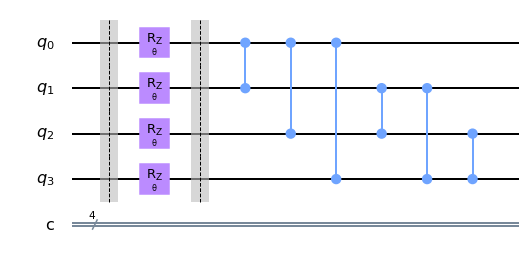

In [31]:
# integrate the parameter theta
theta = Parameter('θ')

pcirc = q.QuantumCircuit(4, 4)

n = 4
   
pcirc.barrier()
pcirc.rz(theta, range(4))
pcirc.barrier()

pcirc.cz(0, 1)
pcirc.cz(0, 2)
pcirc.cz(0, 3)
pcirc.cz(1, 2)
pcirc.cz(1, 3)
pcirc.cz(2, 3)

pcirc.draw('mpl')

In [32]:
theta_range = np.linspace(0, 2 * np.pi, 128)

In [33]:
circuits = [pcirc.bind_parameters({theta: theta_val})
            for theta_val in theta_range]

circuits[-1].draw()

░ ┌─────────┐ ░                   
q_0: ─░─┤ RZ(2pi) ├─░──■──■──■──────────
      ░ ├─────────┤ ░  │  │  │          
q_1: ─░─┤ RZ(2pi) ├─░──■──┼──┼──■──■────
      ░ ├─────────┤ ░     │  │  │  │    
q_2: ─░─┤ RZ(2pi) ├─░─────■──┼──■──┼──■─
      ░ ├─────────┤ ░        │     │  │ 
q_3: ─░─┤ RZ(2pi) ├─░────────■─────■──■─
      ░ └─────────┘ ░                   
c: 4/═══════════════════════════════════

In [34]:
print(pcirc.parameters)

{Parameter(θ)}


In [35]:
# Look at the existance backend
for backend in Aer.backends():
    print(backend)

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


In [36]:
# Choose a backend
sim_backend = Aer.get_backend('qasm_simulator')

In [37]:
job = q.execute(circ, backend=sim_backend, shots=1024)
job_monitor(job)

Job Status: job has successfully run


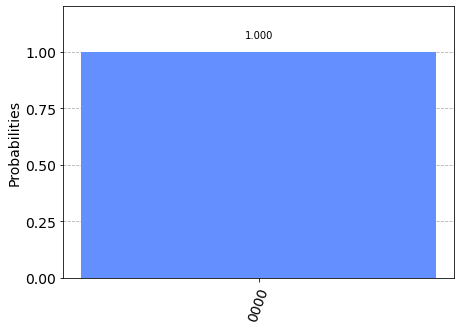

In [38]:
result = job.result()
counts = result.get_counts(circ)
plot_histogram([counts])